<h1>Introduction to Python for Data Science</h1>
<p>**Data science** is a quite generic term that actually includes several different tasks such as data mining, data analysis and data visualization.
Python is an object-oriented scripting/programming language that has gained popularity in the field because of the strength of its main libraries, each of them has been developed and optimized for a given task :</p>
<ul>
<li>**pandas** : The python library to import/export, manipulate and analyse datasets.</li>
<li>**scipy** : The python scientific computing library. Contains many statistical and mathemtical useful functions. Often a prerequisite for many newer libraries.</li>
<li>**numpy** : The python library to efficiently manipulate arrays.</li>
<li>**scikit-learn** : The python machine learning library.</li>
<li>**matplotlib** : The main visualization python library.</li>
<li>**seaborn** : Additional visualization library that works very well in addition to pandas.</li>
</ul>
<p>There obviously exist more libraries that are more specific to a field or a task but we won't use them here.
Note that we use here python3.x as some packages are not supported anymore for python2.7.</p>
<p>To make sure the notebook runs properly check that all libraries are installed on your machine.
Simply run the following command in your current working folder (where this notebook is located) :<br>
```$ pip3 install requirements.txt```
</p>

<p>**Very Important Note** : throughout this tutorial I strongly encourage you to look at the documentation online or built-in to understand what each function keyword means and its effect on the output.
Don't hesitate to experimente and modify keywords, that's the best way to learn!!!</p>

<h3>Importing Libraries</h3>
</p>First things first, we need to import the libraries.
This is done using the built-in `import` command, in addition we give an alias to avoid conflicts between functions that could have the same name in different libraries.

In [ ]:
#pip3 install requirements.txt

In [69]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Dark2')
plt.rcParams['figure.figsize'] = (8,6)
%matplotlib inline

<h2>The Iris Dataset</h2>
<p>For this tutorial we will be looking at the (well known) Iris dataset.
This classic toy dataset consists of 150 flowers of three different kind (setosa, versicolor and virginica) for which we know 4 characteristics/features the sepal length, sepal width, petal length and petal width.</p>
<h3>A first look at the data</h3>
<p>Before doing any kind of analysis we will first "look" at the data.</p>

In [29]:
# Importing the dataset using the pandas function ``read_csv``
iris = pd.read_csv('iris.csv')
type(iris)

pandas.core.frame.DataFrame

<p>When importing data with pandas a **DataFrame** object is created.
This is the central object with pandas, it contains the data in a structure such that it allows for fast and efficient manipulation and analysis.</p>

In [30]:
# Display some information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal_Length    150 non-null float64
Sepal_Width     150 non-null float64
Petal_Length    150 non-null float64
Petal_Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


</p>In the previous cell we asked pandas to give us some information about the imported dataset.
<ul>
<li>The first line tells us how many elements are present and how they are indexed.</li>
<li>The second line gives us the number of columns aka the number of features.</li>
<li>The five following lines correspond to each of the five columns and specify :<br>
_The column name_   -   _the number of non-null entries_   -   _the type of data_</li>
<li>The eighth line summarizes the types of data contained in the dataset.</li>
<li>The last line give you an estimation of the size occupied by the DataFrame in the memory.</li>
</ul>
</p>
<p>It is possible to look at the first 5 entries of the DataFrame with a simple command :</p>

In [31]:
iris.head(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Or at the last 5 entries :

In [32]:
iris.tail(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


<p>In a single line it is possible to counts the unique values per feature :</p>

In [33]:
# If I want to know the how many unique species I have in my DataFrame :
iris.Species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: Species, dtype: int64

<h2>Selection and Manipulation - Pandas Basics</h2>
<p>The first thing to learn in pandas is how to manipulate a DataFrame and the different rules of the library.
You might not want to delete or replace values of the orignal dataset or maybe you do.
Hereafter are introduced basic functions to safely manipulate your DataFrame.</p>
<p>Imagine you first want to look at a specific feature, let's say the flower sepal width you just need to type :</p>

In [34]:
iris.Sepal_Width
# Note that if your column name includes spaces, commas or dots the previous line won't work
# In this case use instead (uncomment the line to check) :
#iris['Sepal_Width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: Sepal_Width, dtype: float64

<p>Note that you can store the output in a variable for later use.</p>
<p>If instead of a specific feature you want to look at specific type of flower you can select the part of the DataFrame that interest you as follow :</p>

In [35]:
setosa = iris.query("Species == 'setosa'")
# Equivalently you can use :
#setosa = iris[iris.Species == 'setosa']
setosa.head(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Note** : the original dataset remains untouched, the setosa entries are still present in the ``iris`` dataset (check it if you want to be sure...).

**EXERCISE : using the previous example create a ``versicolor`` and a ``virginica`` DataFrame containing only versicolor and virginica flowers respectively :**

In [36]:
versicolor = iris.query("Species == 'versicolor'")
virginica = iris.query("Species == 'virginica'")

<p>It is also possible to make fancier selection, for instance if we want to keep flowers with a sepal length superior to 6.5cm and a sepal width inferior to 3.0cm you need to do :</p>

In [37]:
iris.query("Sepal_Length > 6.5 and Sepal_Width < 3.0")

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
58,6.6,2.9,4.6,1.3,versicolor
76,6.8,2.8,4.8,1.4,versicolor
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
130,7.4,2.8,6.1,1.9,virginica


You also have the possibility to directly access a column, a row or a position in the DataFrame in a "array-like" fashion using the instance ``iloc`` :

In [38]:
# accessing a column :
#iris.iloc[:,0]
# accessing a row
iris.iloc[0,:]

Sepal_Length       5.1
Sepal_Width        3.5
Petal_Length       1.4
Petal_Width        0.2
Species         setosa
Name: 0, dtype: object

In [39]:
# accessing a position directly
iris.iloc[2,2]

1.3

<p>All of of the above commands extract information without modifying the original DataFrame. However if you modify the extracted data it also modifies the original DataFrame. To avoid this problem you need to specify that you make a copy of your data :</p>

In [40]:
# Try the following like this and then without the .copy() and notice the difference
# ps: you might need to reload the data if you haven't noticed anything...
sepal_width = setosa.Sepal_Width.copy()
sepal_width.replace(3.0, 0.0, inplace=True)
setosa.Sepal_Width

0     3.5
1     3.0
2     3.2
3     3.1
4     3.6
5     3.9
6     3.4
7     3.4
8     2.9
9     3.1
10    3.7
11    3.4
12    3.0
13    3.0
14    4.0
15    4.4
16    3.9
17    3.5
18    3.8
19    3.8
20    3.4
21    3.7
22    3.6
23    3.3
24    3.4
25    3.0
26    3.4
27    3.5
28    3.4
29    3.2
30    3.1
31    3.4
32    4.1
33    4.2
34    3.1
35    3.2
36    3.5
37    3.6
38    3.0
39    3.4
40    3.5
41    2.3
42    3.2
43    3.5
44    3.8
45    3.0
46    3.8
47    3.2
48    3.7
49    3.3
Name: Sepal_Width, dtype: float64

<p>About the ``replace(3.0, 0.0)`` function :
This function will return a DataFrame where every 3.0 have been replaced by 0.0, the ``inplace`` forces the method to overwrite the DataFrame it is applied to.
The aforementioned keyword can be used with many pandas function, keep this in mind.</p>
<p>Pandas behavior when it comes to copying data can be a bit tricky. It happened several times that people were surprised that their original DataFrame has been modified after few lines of codes. To avoid surprises state clearly ``copy()`` if this is what you want. Be aware of this issue!</p>
<p>There are many more DataFrame manipulation techniques but it is beyond the scope of this tutorial.</p>

In [41]:
# Let's just reload the iris dataset... just in case
iris = pd.read_csv('iris.csv')

<h2>Visualization</h2>
<h3>Histograms and Distribution plots</h3>
<p><p>If we want to visualize the data there are several plotting function directly accessible via pandas.
For instance to visualize the distribution of a single feature it is easily doable using the following commands :</p>

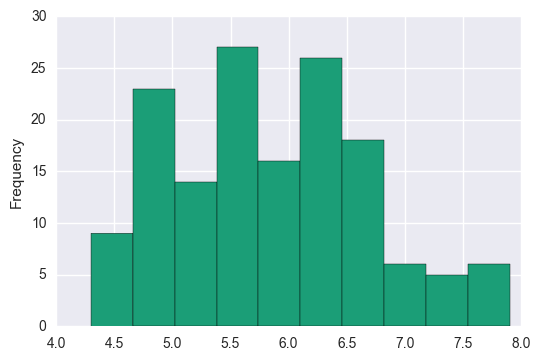

In [42]:
iris.Sepal_Length.plot.hist()

/Users/bbah/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


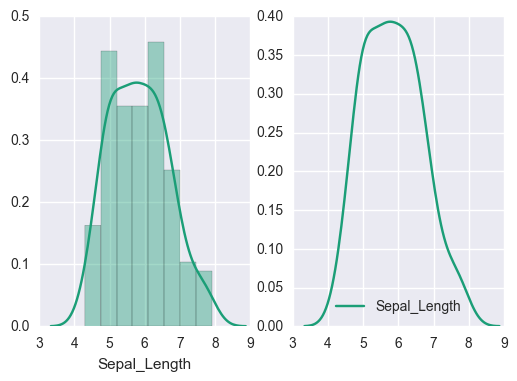

In [43]:
# Alternatively we can include the kde estimation using seaborn library
# First let's make a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.distplot(iris.Sepal_Length, ax=ax[0])
sns.kdeplot(iris.Sepal_Length, ax=ax[1])

<h3>Scatter Plots</h3>
<p>One dimensional visualization is interesting but 2D scatter plot often reveals interesting trends and correlations.
For instance if we want to visualize ``Sepal.Width`` vs ``Sepal.Length`` we can use :</p>

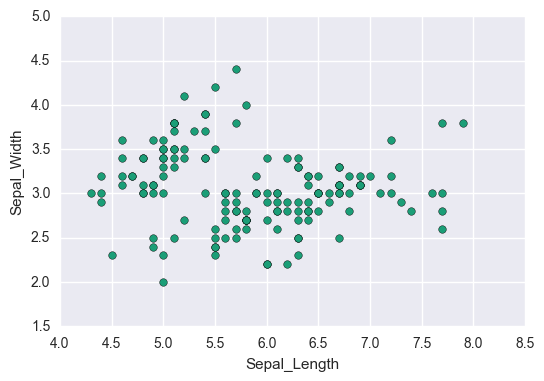

In [44]:
iris.plot.scatter(x='Sepal_Length', y='Sepal_Width', s=30)

<p>As you notice everything is of the same color and we would like to differentiate the three species.<br>
By itself python cannot allocate automatically a color to a Species, that's why for visualization purpose we will create a colour array.</p>

In [47]:
species_cols = iris.Species.replace({'setosa':'C0','versicolor':'C1','virginica':'C2'})

ValueError: to_rgba: Invalid rgba arg "C0"
to_rgb: Invalid rgb arg "C0"
could not convert string to float: 'c0'

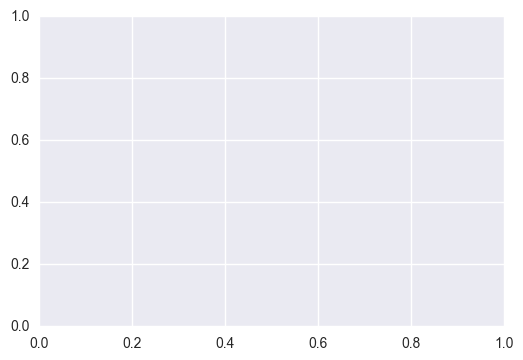

In [48]:
iris.plot.scatter(x='Sepal_Length', y='Sepal_Width', c=species_cols, s=30)

**In the following cell try to visualize the data in ``Petal.Width`` vs ``Petal.Length`` :**

ValueError: to_rgba: Invalid rgba arg "C0"
to_rgb: Invalid rgb arg "C0"
could not convert string to float: 'c0'

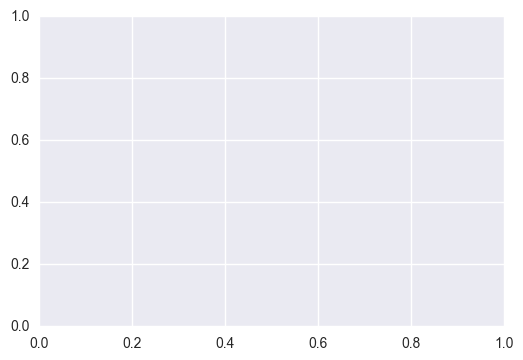

In [49]:
iris.plot.scatter(x='Petal_Length', y='Petal_Width', c=species_cols, s=30)

<p>The seaborn library offers the possibility to directly observe the pairwise scatter plots at once :</p>

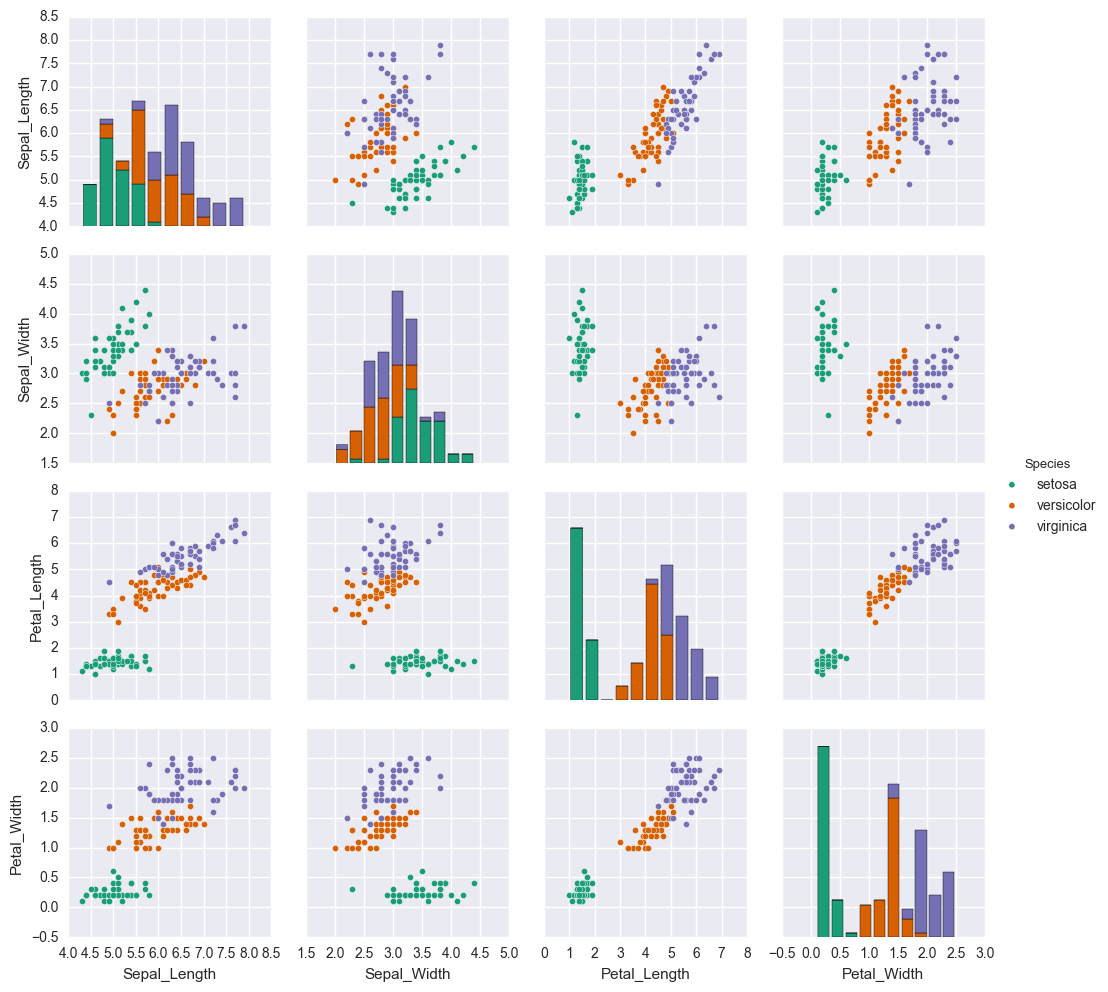

In [50]:
sns.pairplot(data=iris, hue='Species')

<h3>Density Plots</h3>
<p>Scatter are useful but when dealing with large datasets it might not be sufficient, i.e. many points will overlap and it might be more interesting to look at the density rather than the distribution.</p>
<p>There are several possibilities to visualize the data that can be easily done as follow :</p>

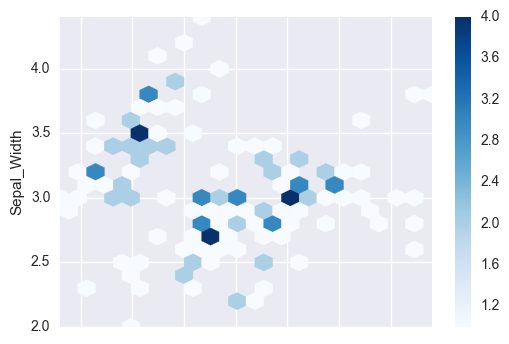

In [51]:
# Using built-in pandas hexbin
iris.plot.hexbin(x='Sepal_Length', y='Sepal_Width', cmap='Blues', gridsize=21, mincnt=1)

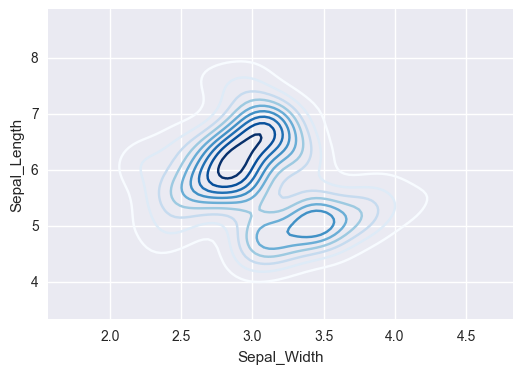

In [52]:
# Using a kde extrapolation
sns.kdeplot(iris['Sepal_Width'], iris['Sepal_Length'],
            cmap="Blues", shade=False, shade_lowest=False)

**EXERCISE :In the following cell try to visualize the kde interpolation for a single type of flower**

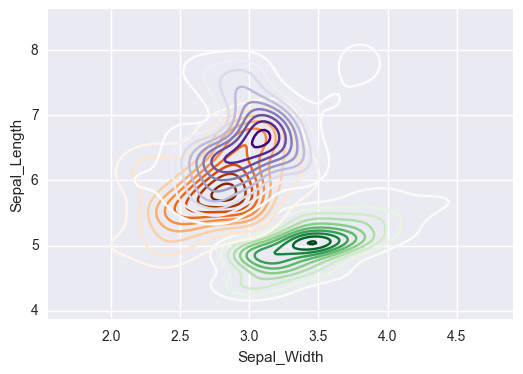

In [53]:
# Subset the iris dataset by species
setosa = iris.query("Species == 'setosa'")
versicolor = iris.query("Species == 'versicolor'")
virginica = iris.query("Species == 'virginica'")

# Draw the two density plots
ax = sns.kdeplot(setosa['Sepal_Width'], setosa['Sepal_Length'],
                 cmap="Greens", shade=False, shade_lowest=False)
sns.kdeplot(versicolor['Sepal_Width'], versicolor['Sepal_Length'],
            cmap="Oranges", shade=False, shade_lowest=False, ax=ax)
sns.kdeplot(virginica['Sepal_Width'], virginica['Sepal_Length'],
            cmap="Purples", shade=False, shade_lowest=False, ax=ax)

<h3>Histogram + Scatter Plot + Density Plot</h3>

<p>Seaborn offers the possibility to visualize one dimnesional distribution, scatter plots and kde estimations at the same time (can take some time to compute):</p>

/Users/bbah/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


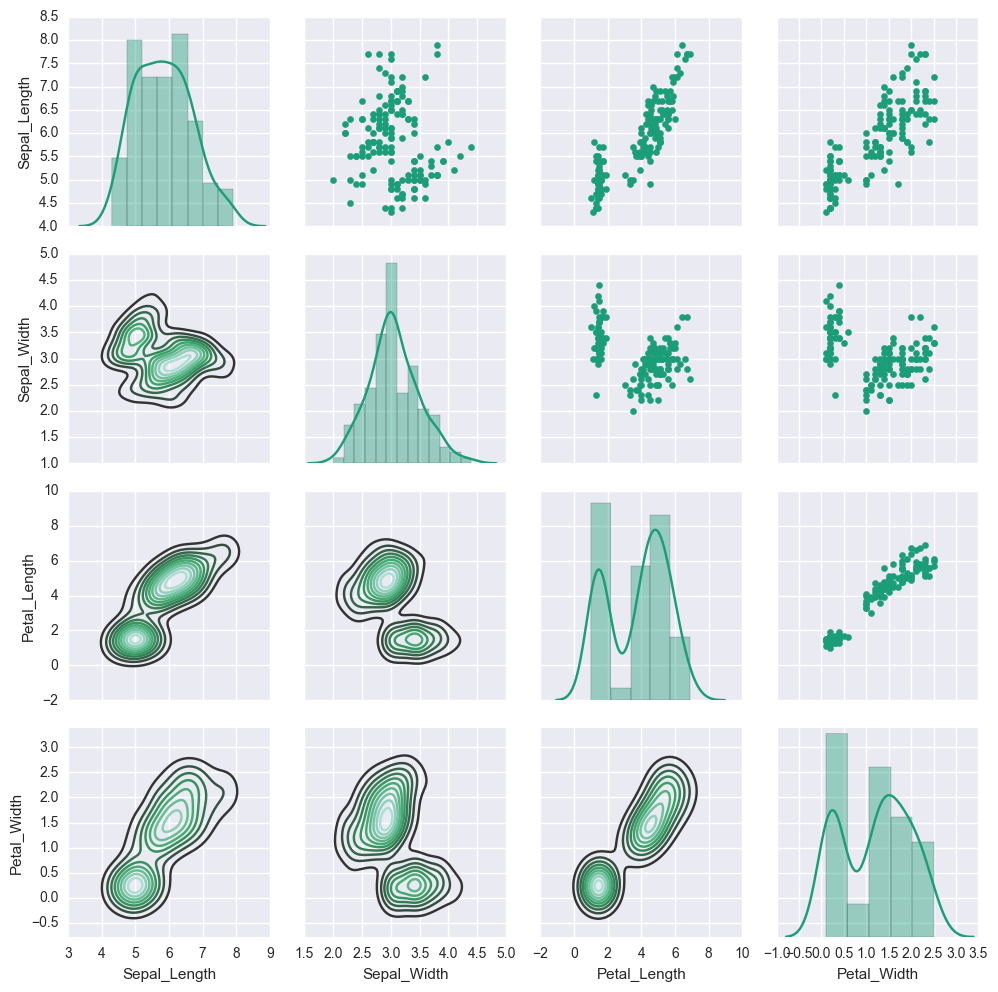

In [54]:
g = sns.PairGrid(iris, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.distplot)

<h2>Data Mining and Satistical Analysis</h2>
<p>Visualisation is a nice way to get familiar with a dataset but it only gives qualitative clues.
The purpose of a statistical analysis is to gives us quantitative information about that same dataset.</p>
<p>A first useful tool is to extract simple quantities such as the minimun value, the maximum value, the mean, the standard deviation and the determination of quartiles.
Fortunately pandas has a built-in function for that :</p>

In [55]:
iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<p>If tables don't speak much to you there is the possibility to visualise everything using boxplots :</p>

/Users/bbah/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11e74c240>,
 'caps': [<matplotlib.lines.Line2D at 0x11e750cf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x11e754f98>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11e754748>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11e74cc18>,
  <matplotlib.lines.Line2D at 0x11e783e80>]}

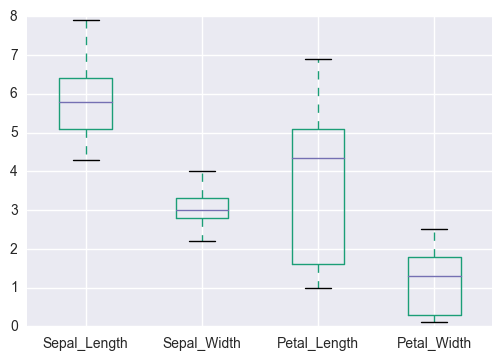

In [56]:
iris.boxplot()

<p>Although this is already quite interesting we might be interested to see the differences by species.
For this purpose there is a very convenient function in pandas named ``groupby`` that will group your DataFrame by same value.
If we want to group the DataFrame by species we just need to type :</p>

In [57]:
groups = iris.groupby(by='Species', as_index=True)

# If you then need to extract the setosa for instance then use the command
#groups.get_group('setosa')

<p>We can now apply the previous ``describe`` function directly and we will obtain :</p>

In [58]:
groups.describe()

Petal_Length  Petal_Width  Sepal_Length  Sepal_Width
Species                                                               
setosa     count     50.000000    50.000000     50.000000    50.000000
           mean       1.462000     0.246000      5.006000     3.428000
           std        0.173664     0.105386      0.352490     0.379064
           min        1.000000     0.100000      4.300000     2.300000
           25%        1.400000     0.200000      4.800000     3.200000
           50%        1.500000     0.200000      5.000000     3.400000
           75%        1.575000     0.300000      5.200000     3.675000
           max        1.900000     0.600000      5.800000     4.400000
versicolor count     50.000000    50.000000     50.000000    50.000000
           mean       4.260000     1.326000      5.936000     2.770000
           std        0.469911     0.197753      0.516171     0.313798
           min        3.000000     1.000000      4.900000     2.000000
           25%        4.000000     1.200000      5.600000     2.525000
           50%        4.350000     1.300000      5.900000     2.800000
           75%        4.600000     1.500000      6.300000     3.000000
           max        5.100000     1.800000      7.000000     3.400000
virginica  count     50.000000    50.000000     50.000000    50.000000
           mean       5.552000     2.026000      6.588000     2.974000
           std        0.551895     0.274650      0.635880     0.322497
           min        4.500000     1.400000      4.900000     2.200000
           25%        5.100000     1.800000      6.225000     2.800000
           50%        5.550000     2.000000      6.500000     3.000000
           75%        5.875000     2.300000      6.900000     3.175000
           max        6.900000     2.500000      7.900000     3.800000

In [59]:
# additionl information can be retrieved using more specific functions
groups.skew()

,Petal_Length,Petal_Width,Sepal_Length,Sepal_Width
Species,,,,
setosa,0.106394,1.253861,0.120087,0.041167
versicolor,-0.606508,-0.031180,0.105378,-0.362845
virginica,0.549445,-0.129477,0.118015,0.365949


/Users/bbah/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


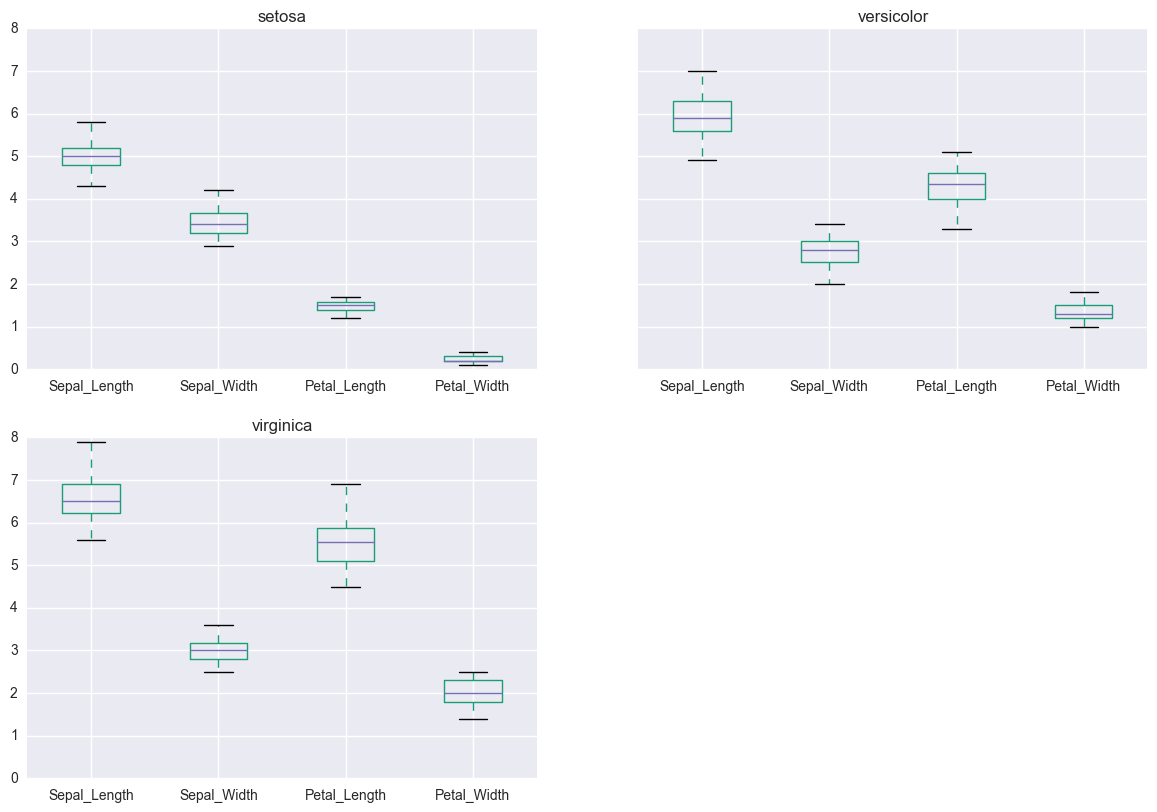

In [60]:
_ = groups.boxplot(figsize=(14,10))

<p>Very often you will be interested in quantifying the correlation or covariance between features.
Computing and visualizing the correlation matrix can be done as follow :</p>

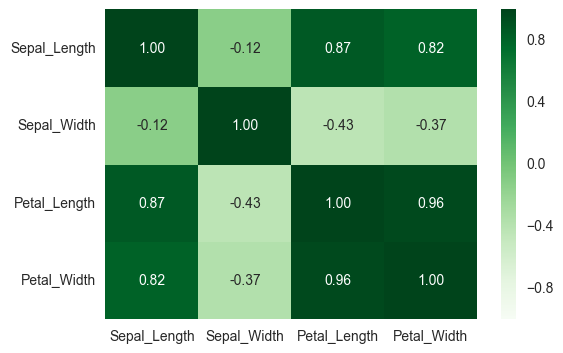

In [61]:
iris_corr = iris.corr()
sns.heatmap(iris_corr, annot=True, fmt='0.2f', cmap='Greens')

**EXERCISE : compute and visualize the correlation matrix for each iris species seperately**

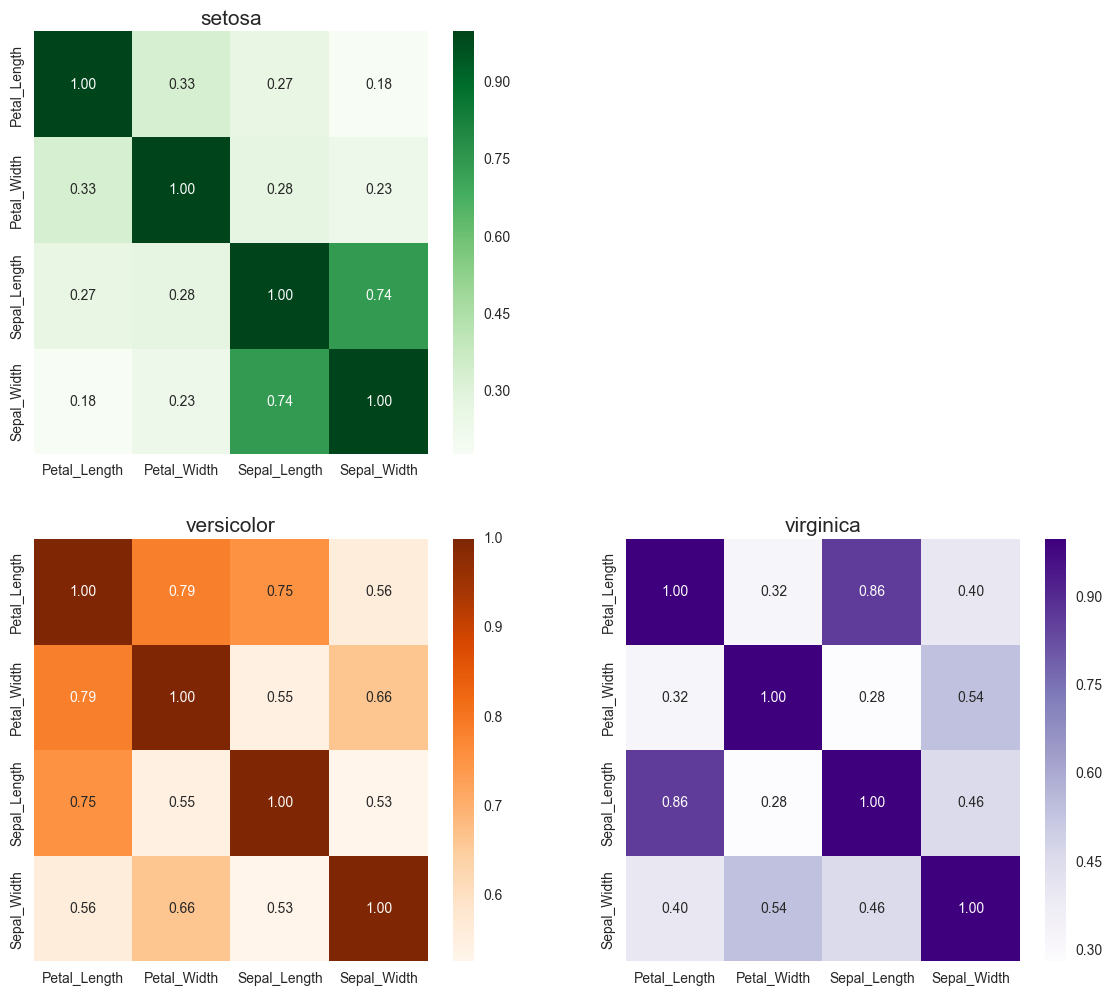

In [62]:
setosa = groups.get_group('setosa')
versicolor = groups.get_group('versicolor')
virginica = groups.get_group('virginica')

plt.figure(figsize=(14,12))

ax1 = plt.subplot(221)
sns.heatmap(setosa.corr(), annot=True, fmt='0.2f', cmap='Greens', ax=ax1)
ax1.set_title('setosa', fontsize=15)

ax2 = plt.subplot(223)
sns.heatmap(versicolor.corr(), annot=True, fmt='0.2f', cmap='Oranges', ax=ax2)
ax2.set_title('versicolor', fontsize=15)

ax3 = plt.subplot(224)
sns.heatmap(virginica.corr(), annot=True, fmt='0.2f', cmap='Purples', ax=ax3)
ax3.set_title('virginica', fontsize=15)